In [1]:
from collections import Counter
from matplotlib import pyplot as plt


class PredicitionHolder():

    def __init__(self, persona_list, slot_number, inherit_type, possible_skills):
        # open file to data variable
        with open("/home/eduardo/Documents/Persona3/AutoTelos/kikuriHime/predictions_{}//predictions_logs-{}-optimal_recipes.txt_{}.log".format(inherit_type,inherit_type,slot_number), "r") as f:
            log_file_content = f.readlines()

        self.persona_list = persona_list

        self.predictions = exclude_lines_with_duplicates(log_file_content)

        self.possible_skills = possible_skills

        # Initialize a counter with all possible values set to 0
        value_counts_with_all_possible = Counter({value: 0 for value in possible_skills})

        # Flatten the list of lists
        all_values = [item for sublist in self.predictions for item in sublist]

        # Update this counter with the actual occurrences
        value_counts_with_all_possible.update(all_values)
        self.value_counts_with_all_possible =  value_counts_with_all_possible


        # sum all values in the counter
        total = sum(value_counts_with_all_possible.values())

        # Create a dictionary with the percentage of each value
        percentage = {key: value/total for key, value in value_counts_with_all_possible.items()}

        self.percentage = percentage

    def show(self):

        print("Persona List: ", self.persona_list)

        # Now to visualize these counts as a histogram, ensuring all possible values are included
        plt.figure(figsize=(12, 8))
        plt.bar(self.value_counts_with_all_possible.keys(), self.value_counts_with_all_possible.values())
        plt.xlabel('Skill Names')
        plt.ylabel('Counts')
        plt.title('Histogram of Skill Occurrences Including All Possible Values')
        plt.xticks(rotation=90, ha="right")
        plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
        plt.show()




# Function to parse each line as a list and check for duplicates
def exclude_lines_with_duplicates(log_lines):
    unique_lines = []  # This will hold only the lines without any duplicates
    for line_str in log_lines:
        try:
            # Parsing the string to a list
            line_list = eval(line_str)
            # Check for duplicates: Add to unique_lines only if there are no duplicates
            if len(line_list) == len(set(line_list)):
                unique_lines.append(line_list)
        except Exception as e:
            # In case of an error in parsing, you can decide how to handle it,
            # for example, by logging the error or skipping the line.
            # This example will skip the line.
            pass
    return unique_lines



In [2]:
import re

class InheritanceTypeHolder():


    def __init__(self, inherit_type):
        #open the file
        #'C:\\Users\\Eduardo\\Documents\\Projects\\AutoTelos\\Persona3FES-FusionHelper\\fusion_navigator\\logs_optimal_solutions\\logs-{}-optimal_recipes.txt'
        with open('/home/eduardo/Documents/Persona3/AutoTelos/fusion_navigator/logs_optimal_solutions/logs-{}-optimal_recipes.txt'.format(inherit_type), 'r') as file:
            file_content = file.read()
            predictionHolders = parse_file(file_content,inherit_type)
        
        self.predictionHolders = predictionHolders

def parse_personas(persona_string):
    return re.findall(r"\('([\w\s-]+)', \d+, '([\w\s]+)'\)", persona_string)


def parse_skills(skill_string):
    return [skill.strip().strip("'").strip('"') for skill in skill_string.strip('[]').split(',')]

def parse_file(file_content,inherit_type):
    predictionHolders = []
    sections = file_content.split('------------------------\n')

    for section in sections:
        if section.strip() == '':
            continue

        personas = re.findall(r"Personas: \[([^\]]+)\]", section)
        skills = re.findall(r"Skills: \[([^\]]+)\]", section)
        result_persona = re.search(r"Resulting Persona: ([\w\s]+?)\s*$", section, re.MULTILINE)
        base_skills_amount = re.search(r"Base Skills Ammount: (\d+)", section)
        inherit_slots_amount = re.search(r"Inherited Skills Ammount: (\d+)", section)
        save_state_slot = re.search(r"key f(\d+)", section)

        if personas and skills and result_persona and base_skills_amount and inherit_slots_amount and save_state_slot:
            persona_list = parse_personas(personas[0])
            #print(persona_list)
            skill_set = parse_skills(skills[0])
            #TODO maybe i should plot the coverage
            save_state_slot = int(save_state_slot.group(1))
            

            ph = PredicitionHolder(persona_list,save_state_slot, inherit_type, skill_set)

            #recipe = RecipeController(skill_set, base_skills_amount, inherit_slots_amount, result_persona_name, fusion_spread_type, save_state_slot)
            predictionHolders.append(ph)

    return predictionHolders

Persona List:  [('alice', 'Death'), ('okuninushi', 'Temperance'), ('take-mikazuchi', 'Emperor')]


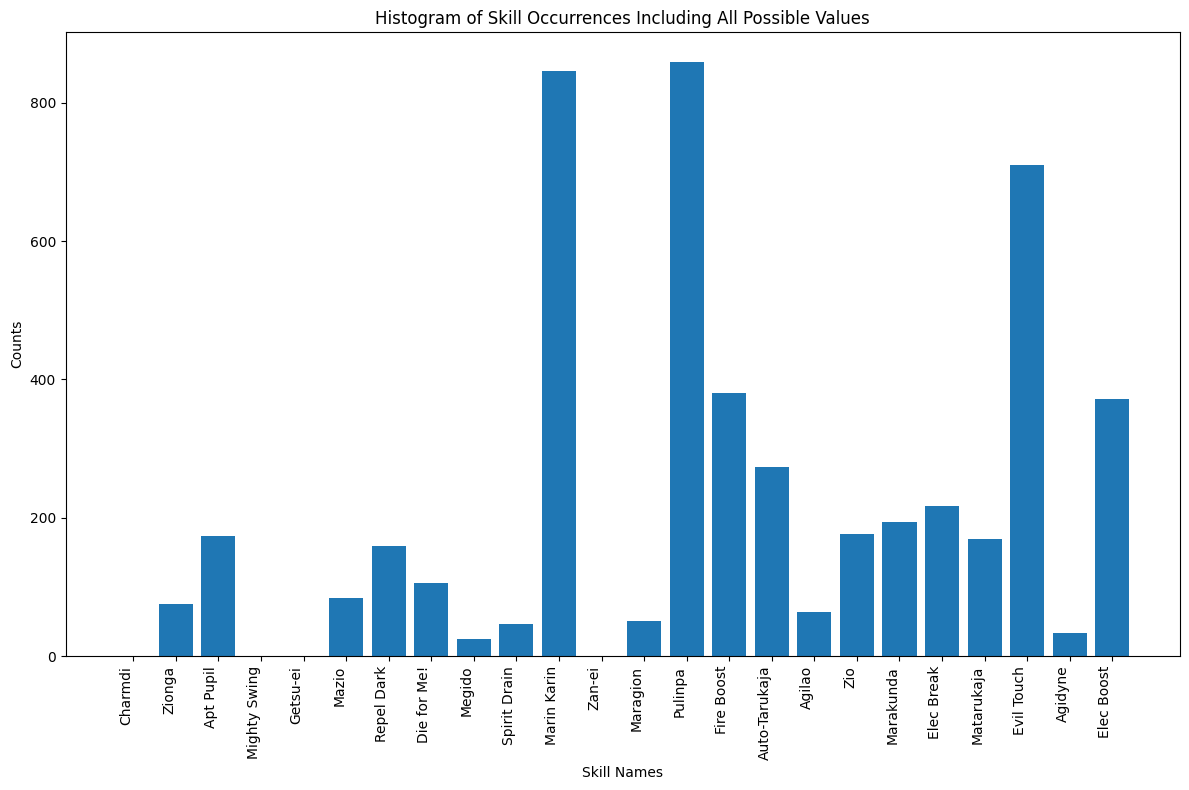

Persona List:  [('hecatoncheires', 'Hanged Man'), ('surt', 'Magician'), ('fortuna', 'Fortune')]


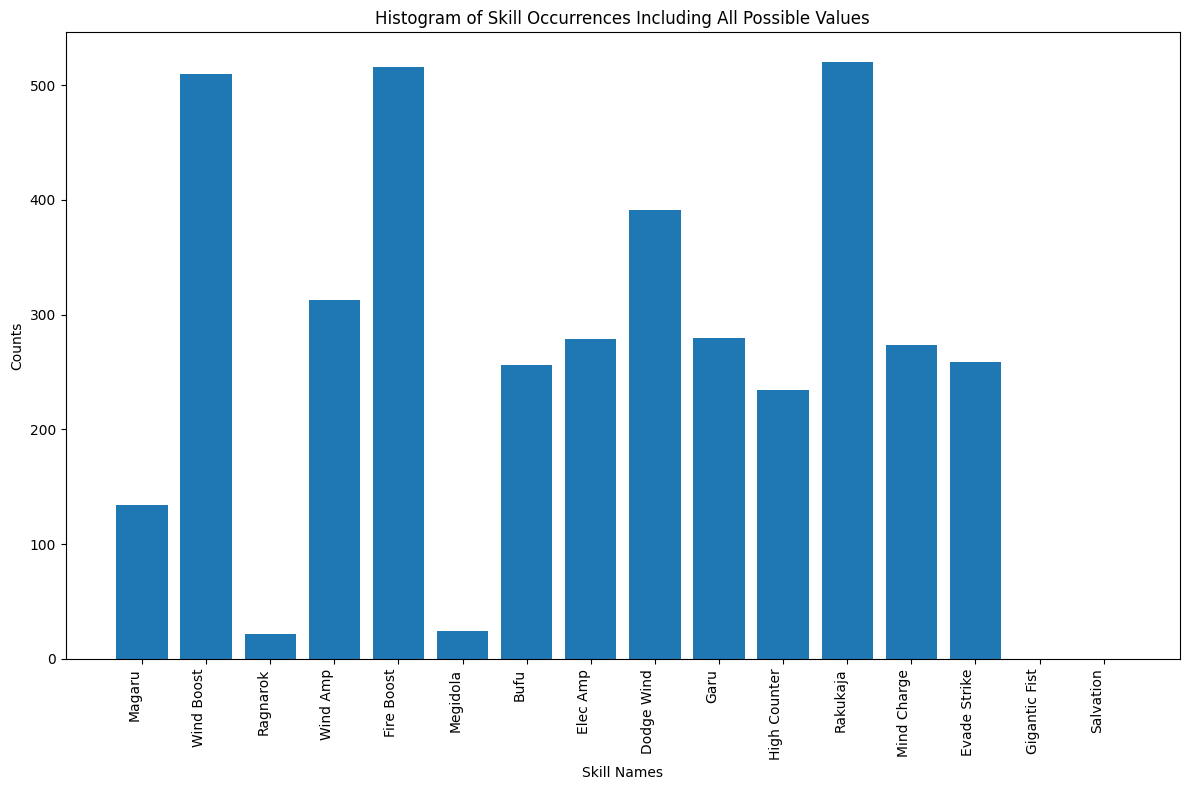

Persona List:  [('helel', 'Star'), ('power', 'Justice'), ('valkyrie', 'Strength')]


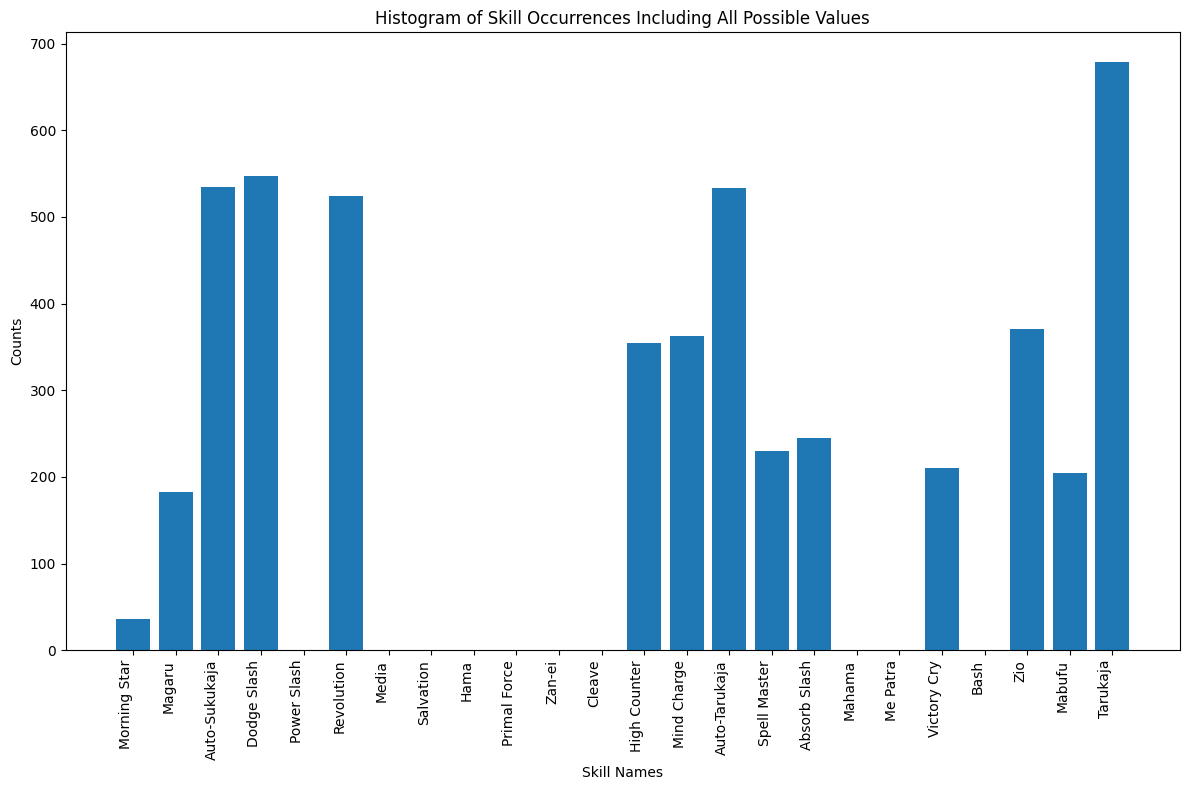

Persona List:  [('kali', 'Strength'), ('pazuzu', 'Devil'), ('cu chulainn', 'Tower')]


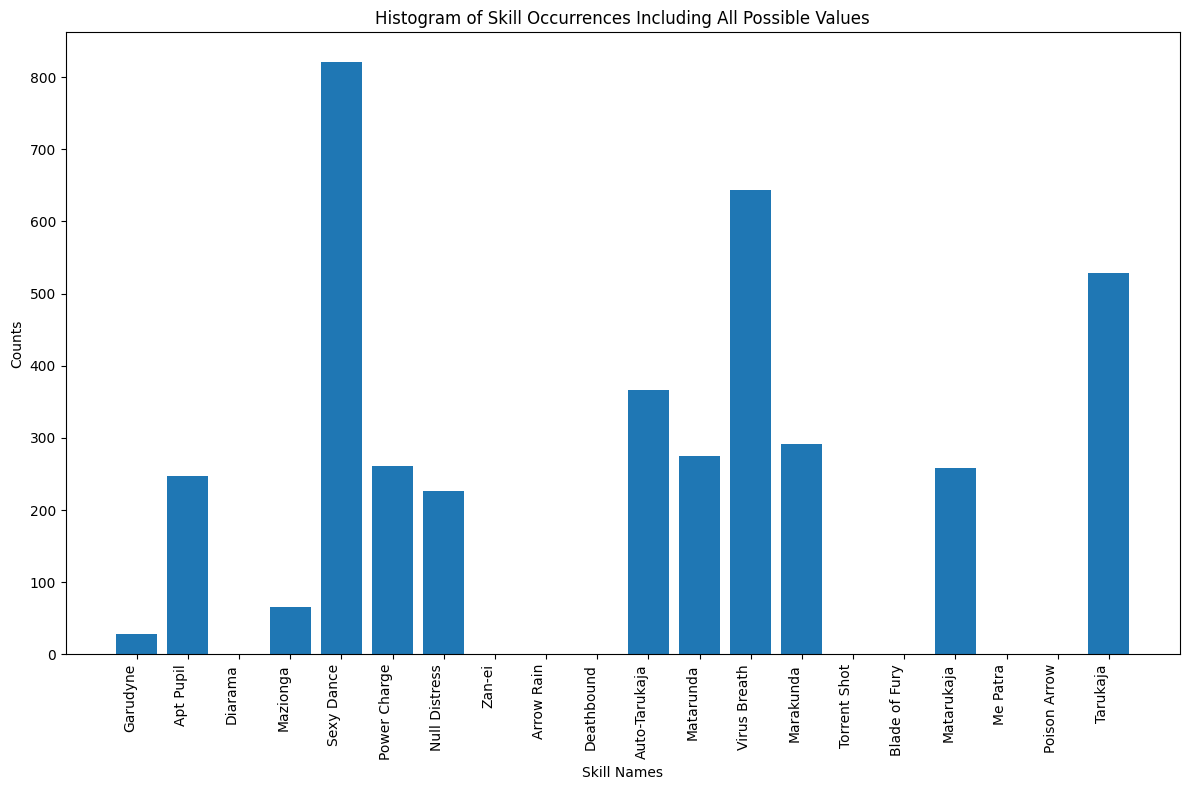

Persona List:  [('loki', 'Fool'), ('laksmi', 'Empress'), ('inugami', 'Hanged Man')]


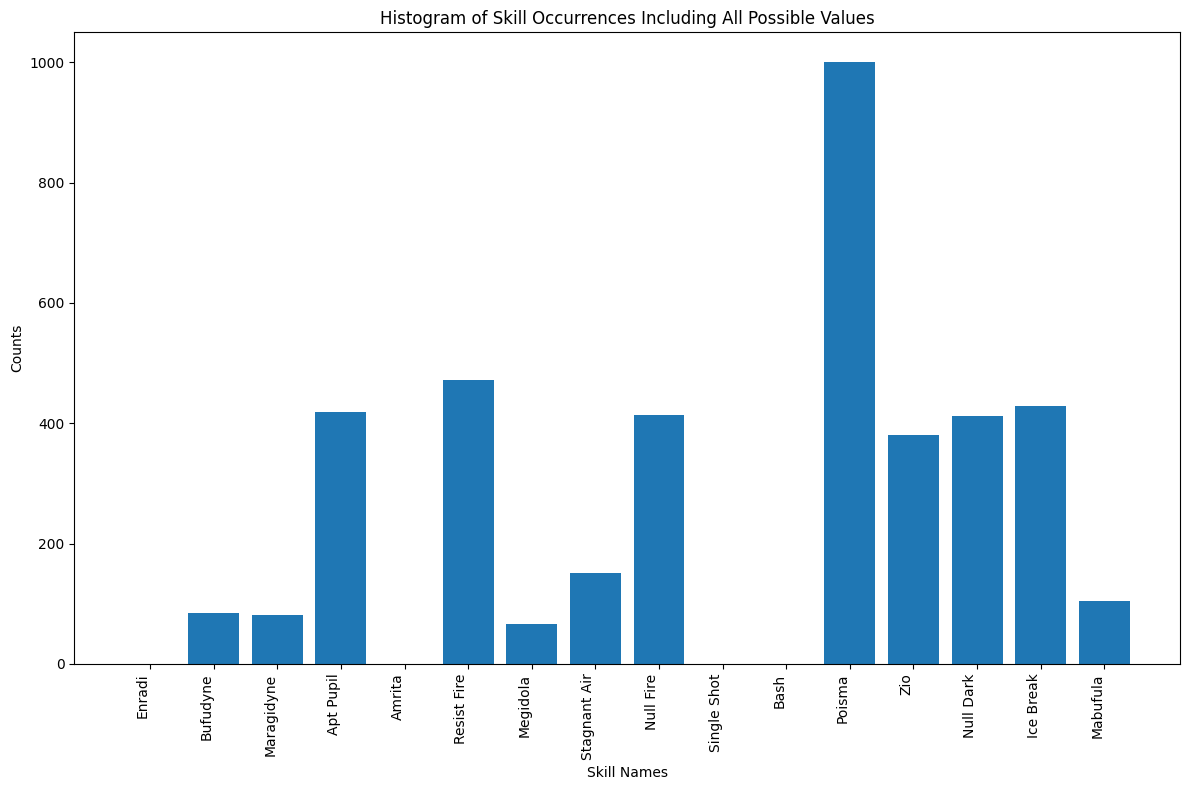

Persona List:  [('lucifer', 'Judgment'), ('scathach', 'Priestess'), ('genbu', 'Temperance')]


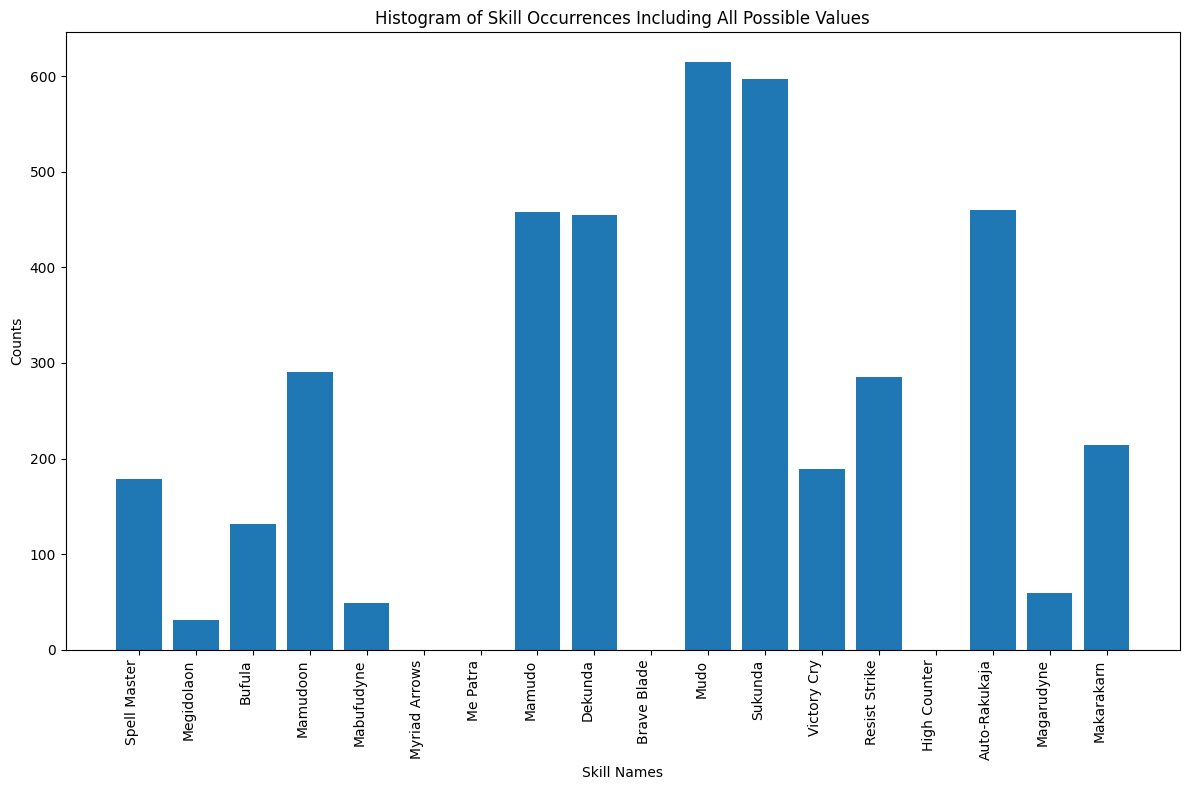

Persona List:  [('siegfried', 'Strength'), ('throne', 'Justice'), ('chimera', 'Chariot')]


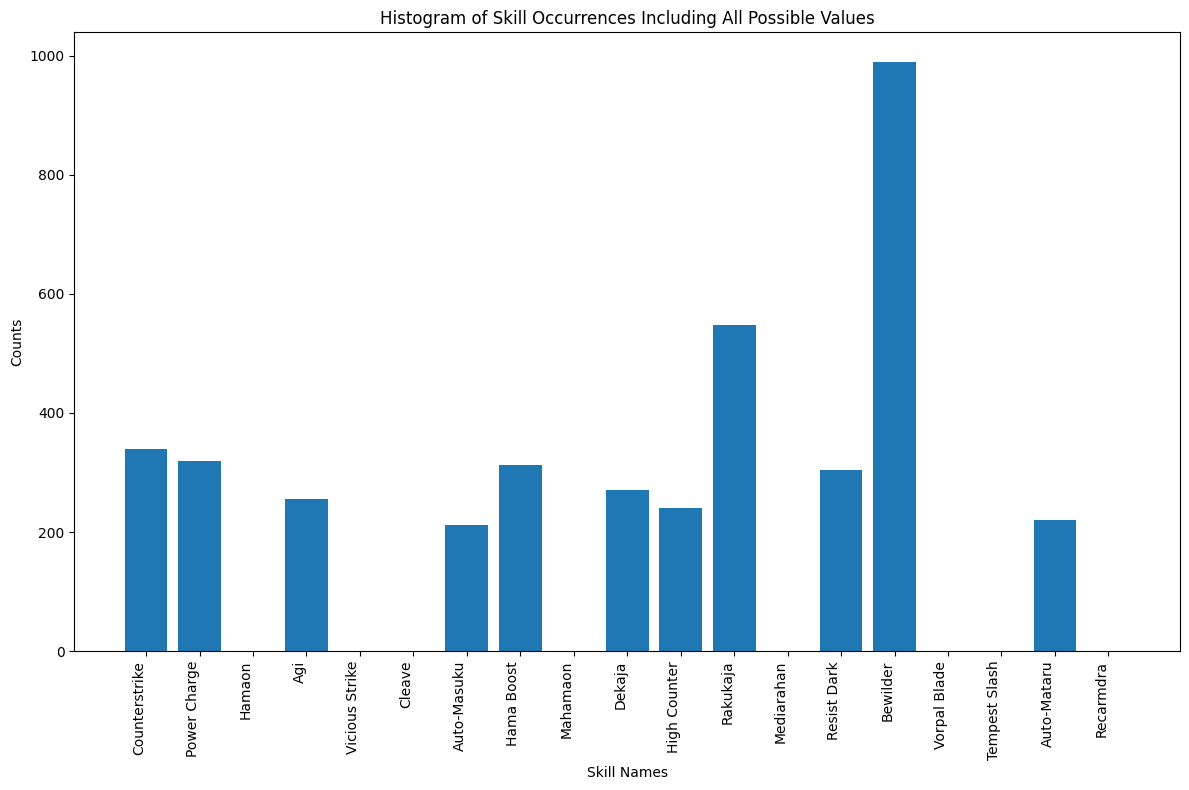

Persona List:  [('skadi', 'Empress'), ('odin', 'Emperor'), ('daisoujou', 'Hierophant')]


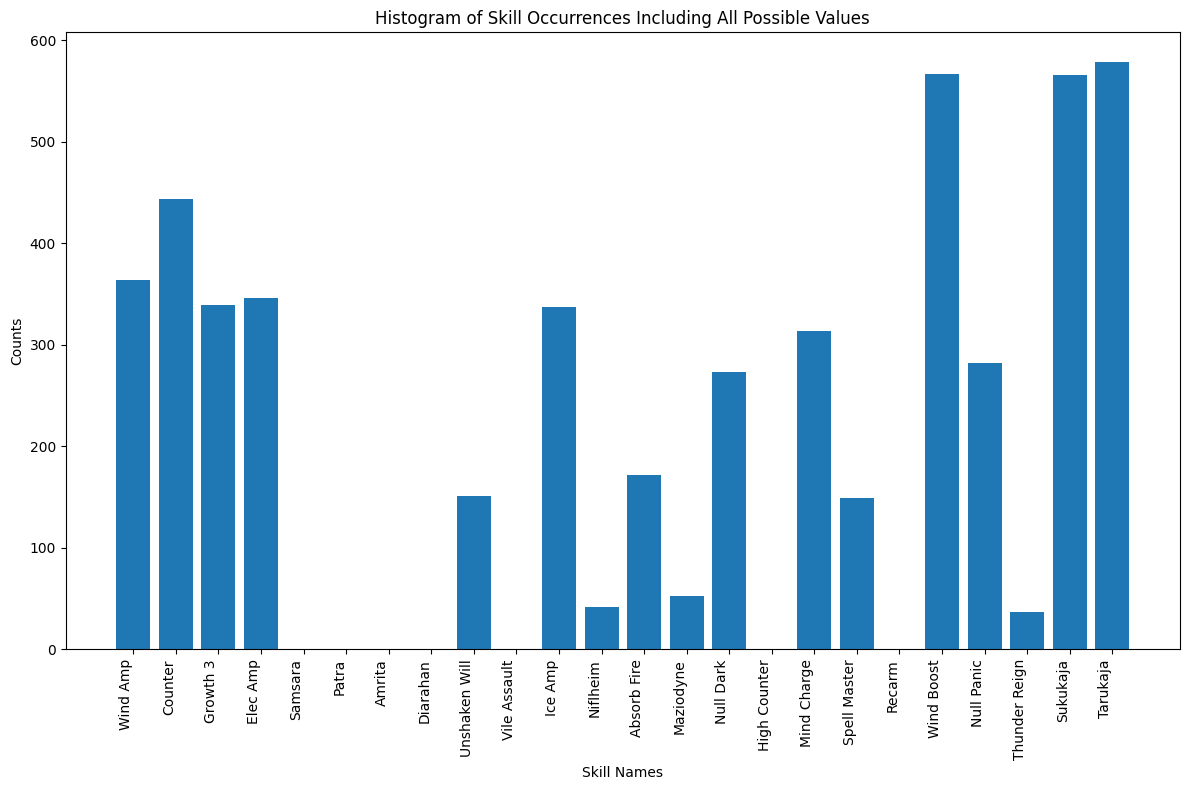

Persona List:  [('ubelluris', 'Hanged Man'), ('mot', 'Death'), ('vetala', 'Devil')]


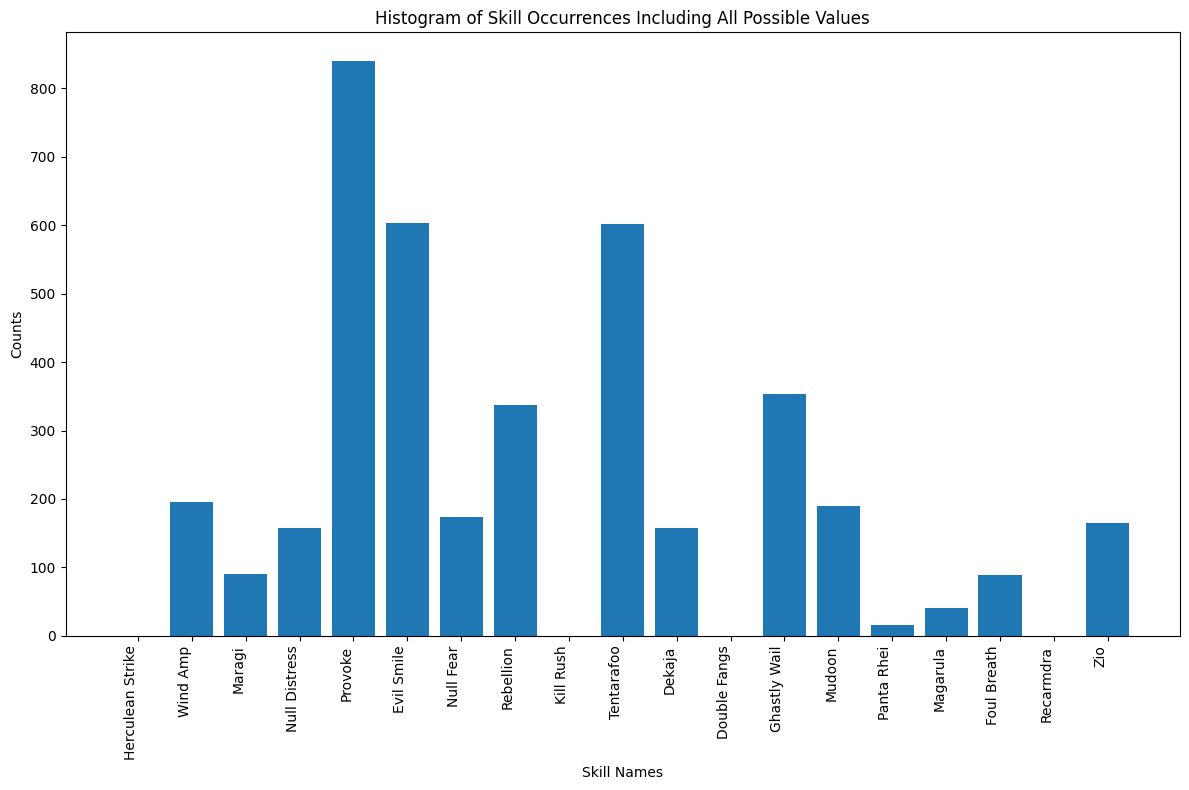

Persona List:  [('vishnu', 'Sun'), ('orobas', 'Magician'), ('gurr', 'Moon')]


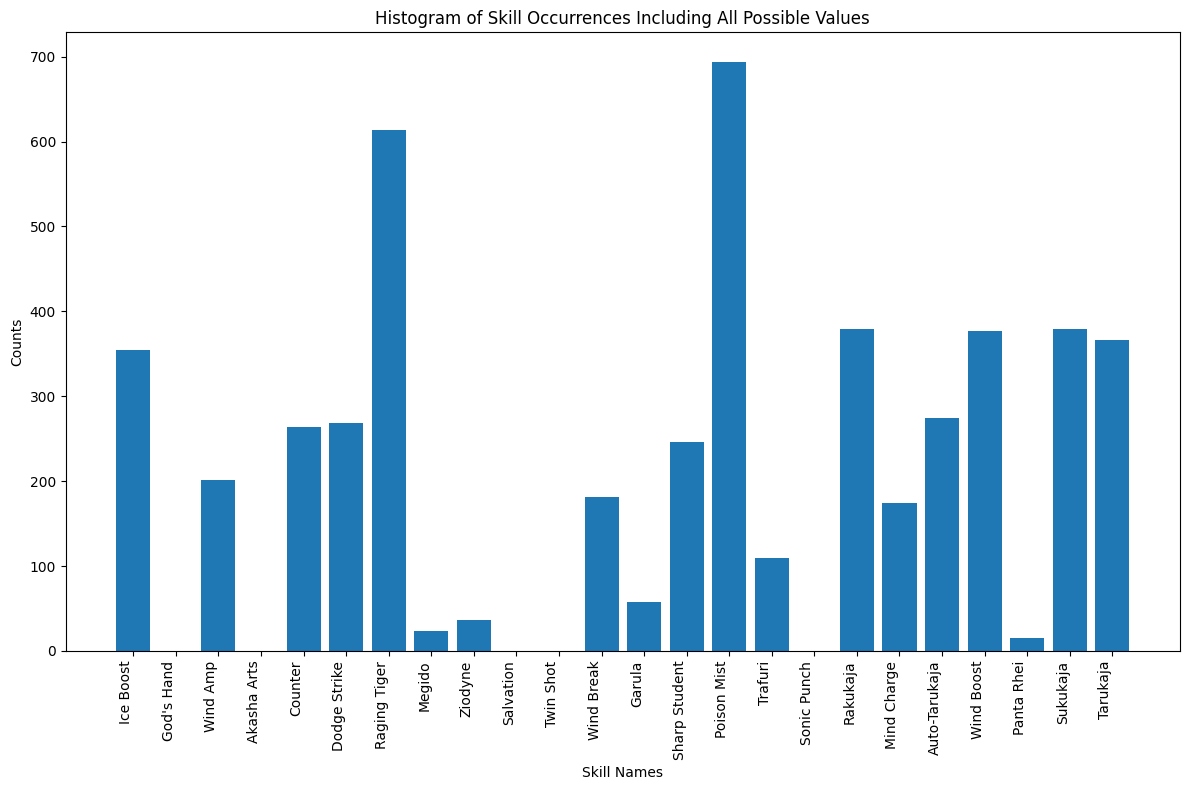

In [3]:
all_holder = InheritanceTypeHolder("BAD STATUS")

for holder in all_holder.predictionHolders:
    holder.show()

In [4]:
print(all_holder.predictionHolders[0].percentage)

{'Charmdi': 0.0, 'Zionga': 0.015154536390827518, 'Apt Pupil': 0.034695912263210366, 'Mighty Swing': 0.0, 'Getsu-ei': 0.0, 'Mazio': 0.01674975074775673, 'Repel Dark': 0.0317048853439681, 'Die for Me!': 0.021136590229312063, 'Megido': 0.004785643070787637, 'Spirit Drain': 0.009172482552342971, 'Marin Karin': 0.1686939182452642, 'Zan-ei': 0.0, 'Maragion': 0.010169491525423728, 'Pulinpa': 0.17128614157527416, 'Fire Boost': 0.07597208374875374, 'Auto-Tarukaja': 0.05443668993020937, 'Agilao': 0.012761714855433698, 'Zio': 0.03509471585244267, 'Marakunda': 0.0386839481555334, 'Elec Break': 0.04327018943170489, 'Matarukaja': 0.03369890329012961, 'Evil Touch': 0.1415752741774676, 'Agidyne': 0.006779661016949152, 'Elec Boost': 0.07417746759720838}


In [5]:


# Create a dictionary to store the percentages
percentages = {}

for holder in all_holder.predictionHolders:
    # Get the "percentage" dictionary from the holder
    percentage_dict = holder.percentage  # Assuming 'percentage' is an attribute of holder

    # Iterate over the items in the percentage dictionary
    for key, value in percentage_dict.items():
        # If the key is already in the percentages dictionary, append the value to the list
        if key in percentages:
            percentages[key].append(value)
        # Otherwise, add a new list with the value to the percentages dictionary
        else:
            percentages[key] = [value]

# Now, percentages is a dictionary where the keys are the keys from the percentage dictionaries,
# and the values are lists of values for each key from all percentage dictionaries

# Print the keys and their corresponding lists of values
for key, values in percentages.items():
    print(f"{key}: {values}")

Charmdi: [0.0]
Zionga: [0.015154536390827518]
Apt Pupil: [0.034695912263210366, 0.06156530408773679, 0.10443668993020937]
Mighty Swing: [0.0]
Getsu-ei: [0.0]
Mazio: [0.01674975074775673]
Repel Dark: [0.0317048853439681]
Die for Me!: [0.021136590229312063]
Megido: [0.004785643070787637, 0.004785643070787637]
Spirit Drain: [0.009172482552342971]
Marin Karin: [0.1686939182452642]
Zan-ei: [0.0, 0.0, 0.0]
Maragion: [0.010169491525423728]
Pulinpa: [0.17128614157527416]
Fire Boost: [0.07597208374875374, 0.12861415752741776]
Auto-Tarukaja: [0.05443668993020937, 0.10628115653040877, 0.09147557328015953, 0.054636091724825524]
Agilao: [0.012761714855433698]
Zio: [0.03509471585244267, 0.07397806580259222, 0.09471585244267199, 0.04112662013958126]
Marakunda: [0.0386839481555334, 0.07278165503489531]
Elec Break: [0.04327018943170489]
Matarukaja: [0.03369890329012961, 0.06430707876370888]
Evil Touch: [0.1415752741774676]
Agidyne: [0.006779661016949152]
Elec Boost: [0.07417746759720838]
Magaru: [0.033

In [6]:
import pandas as pd
# 'C:\\Users\\Eduardo\\Documents\\Projects\\AutoTelos\\Persona3FES-FusionHelper\\skills_list\\skills.csv'
skills_csv_path = "/home/eduardo/Documents/Persona3/AutoTelos/skills_list/skills.csv"
df = pd.read_csv(skills_csv_path)

#print(df)

skill_type_dict = df.set_index('skill')['type'].to_dict()

skill_rank_dict = df.set_index('skill')['rank'].to_dict()

print(skill_type_dict)
print(skill_rank_dict)

{'Cleave': 'Slash', 'Power Slash': 'Slash', 'Getsu-ei': 'Slash', 'Zan-ei': 'Slash', 'Gale Slash': 'Slash', 'Mighty Swing': 'Slash', 'Fatal End': 'Slash', 'Blade of Fury': 'Slash', 'Deathbound': 'Slash', "Heaven's Blade": 'Slash', 'Tempest Slash': 'Slash', 'Brave Blade': 'Slash', 'Scarlet Havoc': 'Slash', 'Vorpal Blade': 'Slash', 'Bash': 'Strike', 'Assault Dive': 'Strike', 'Sonic Punch': 'Strike', 'Swift Strike': 'Strike', 'Kill Rush': 'Strike', 'Herculean Strike': 'Strike', 'Gigantic Fist': 'Strike', 'Heat Wave': 'Strike', 'Vicious Strike': 'Strike', 'Akasha Arts': 'Strike', "God's Hand": 'Strike', 'Shadow Hound': 'Strike', 'Weary Thrust': 'Strike', 'Single Shot': 'Pierce', 'Double Fangs': 'Pierce', 'Holy Arrow': 'Pierce', 'Twin Shot': 'Pierce', 'Cruel Attack': 'Pierce', 'Torrent Shot': 'Pierce', 'Vile Assault': 'Pierce', 'Poison Arrow': 'Pierce', 'Arrow Rain': 'Pierce', 'Myriad Arrows': 'Pierce', 'Pralaya': 'Pierce', 'Primal Force': 'Pierce', 'Agi': 'Fire', 'Maragi': 'Fire', 'Agilao':

In [7]:
# Create a dictionary to store the skills by type and rank
skills_by_type_and_rank = {}

for key, values in percentages.items():
    # Get the skill type and rank from the dictionaries
    skill_type = skill_type_dict[key]
    skill_rank = skill_rank_dict[key]

    # Create a tuple of skill type and rank
    type_and_rank = (skill_type, skill_rank)

    # If the type and rank is already in the dictionary, append the skill to the list
    if type_and_rank in skills_by_type_and_rank:
        skills_by_type_and_rank[type_and_rank].append(key)
    # Otherwise, add a new list with the skill to the dictionary
    else:
        skills_by_type_and_rank[type_and_rank] = [key]

# Now, skills_by_type_and_rank is a dictionary where the keys are tuples of skill type and rank,
# and the values are lists of skills with that type and rank

# Print the type and rank and their corresponding lists of skills
for type_and_rank, skills in skills_by_type_and_rank.items():
    print(f"{type_and_rank}: {skills}")

('Recovery', 2): ['Charmdi', 'Enradi']
('Elec', 3): ['Zionga']
('Passive', 3): ['Apt Pupil', 'Auto-Tarukaja', 'Dodge Wind', 'Auto-Sukukaja', 'Dodge Slash', 'Auto-Rakukaja', 'Counter', 'Dodge Strike']
('Slash', 4): ['Mighty Swing']
('Slash', 3): ['Getsu-ei', 'Zan-ei']
('Elec', 2): ['Mazio']
('Passive', 6): ['Repel Dark', 'Auto-Masuku', 'Auto-Mataru']
('Dark', 9): ['Die for Me!']
('Almighty', 6): ['Megido']
('Almighty', 4): ['Spirit Drain']
('Bad Status', 2): ['Marin Karin', 'Pulinpa', 'Provoke']
('Fire', 4): ['Maragion']
('Passive', 2): ['Fire Boost', 'Elec Boost', 'Wind Boost', 'Ice Boost']
('Fire', 3): ['Agilao']
('Elec', 1): ['Zio']
('Enhance', 4): ['Marakunda', 'Elec Break', 'Power Charge', 'Matarunda', 'Ice Break', 'Wind Break']
('Enhance', 5): ['Matarukaja', 'Mind Charge', 'Dekaja']
('Bad Status', 3): ['Evil Touch', 'Sexy Dance', 'Poison Mist']
('Fire', 5): ['Agidyne']
('Wind', 2): ['Magaru']
('Fire', 9): ['Ragnarok']
('Passive', 4): ['Wind Amp', 'Elec Amp', 'Resist Fire', 'Counte

In [10]:
# load '/home/eduardo/Documents/Persona3/AutoTelos/inheritance_calculator/inheritance.csv' into a dataframe
inheritance_df = pd.read_csv('/home/eduardo/Documents/Persona3/AutoTelos/inheritance_calculator/inheritance.csv')


# Convert the DataFrame to a dictionary where each key is an inheritance type
# and its value is another dictionary of skill types and their probabilities.
inheritance_dict = inheritance_df.set_index('Inheritance Type').T.to_dict('dict')

print(inheritance_dict['BAD STATUS'])

{'Slash': 0.0, 'Strike': 0.0, 'Pierce': 0.0, 'Fire': 0.2, 'Ice': 0.2, 'Elec': 0.2, 'Wind': 0.2, 'Light': 0.0, 'Dark': 1.0, 'Recovery': 0.0, 'Enhance': 1.0, 'Bad Status': 3.8, 'Special': 1.0, 'Almighty': 0.2, 'Passive': 1.0}


In [17]:
percentages


inheritance_dict_specific_type = inheritance_dict['BAD STATUS']


for key, values in percentages.items():
    for type_and_rank, skills in skills_by_type_and_rank.items():
        skill_type = type_and_rank[0]

        ratio_for_type = inheritance_dict_specific_type[skill_type]

        ratio_is_not_zero = False

        for s in skills:
            if ratio_for_type == 0 and s == key:
                print(f"Skill: {key}, Type: {skill_type}, Ratio: {ratio_for_type}, Probabilities: {values}")
                for v in values:
                    if v > 0:
                        ratio_is_not_zero = True
                        print('ratio is not zero')

if (ratio_is_not_zero):
    print('ratio is not zero')

        

Skill: Charmdi, Type: Recovery, Ratio: 0.0, Probabilities: [0.0]
Skill: Mighty Swing, Type: Slash, Ratio: 0.0, Probabilities: [0.0]
Skill: Getsu-ei, Type: Slash, Ratio: 0.0, Probabilities: [0.0]
Skill: Zan-ei, Type: Slash, Ratio: 0.0, Probabilities: [0.0, 0.0, 0.0]
Skill: Gigantic Fist, Type: Strike, Ratio: 0.0, Probabilities: [0.0]
Skill: Salvation, Type: Recovery, Ratio: 0.0, Probabilities: [0.0, 0.0, 0.0]
Skill: Power Slash, Type: Slash, Ratio: 0.0, Probabilities: [0.0]
Skill: Media, Type: Recovery, Ratio: 0.0, Probabilities: [0.0]
Skill: Hama, Type: Light, Ratio: 0.0, Probabilities: [0.0]
Skill: Primal Force, Type: Pierce, Ratio: 0.0, Probabilities: [0.0]
Skill: Cleave, Type: Slash, Ratio: 0.0, Probabilities: [0.0, 0.0]
Skill: Mahama, Type: Light, Ratio: 0.0, Probabilities: [0.0]
Skill: Me Patra, Type: Recovery, Ratio: 0.0, Probabilities: [0.0, 0.0, 0.0]
Skill: Bash, Type: Strike, Ratio: 0.0, Probabilities: [0.0, 0.0]
Skill: Diarama, Type: Recovery, Ratio: 0.0, Probabilities: [0.0]